<a href="https://colab.research.google.com/github/20-hayato/machine_learning_test/blob/main/lesson3__exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,0.0
1,2,21,15,81,0.0
2,3,20,16,6,1.0
3,4,23,16,77,1.0
4,5,31,17,40,1.0
...,...,...,...,...,...
195,196,35,120,79,1.0
196,197,45,126,28,1.0
197,198,32,126,74,0.0
198,199,32,137,18,0.0


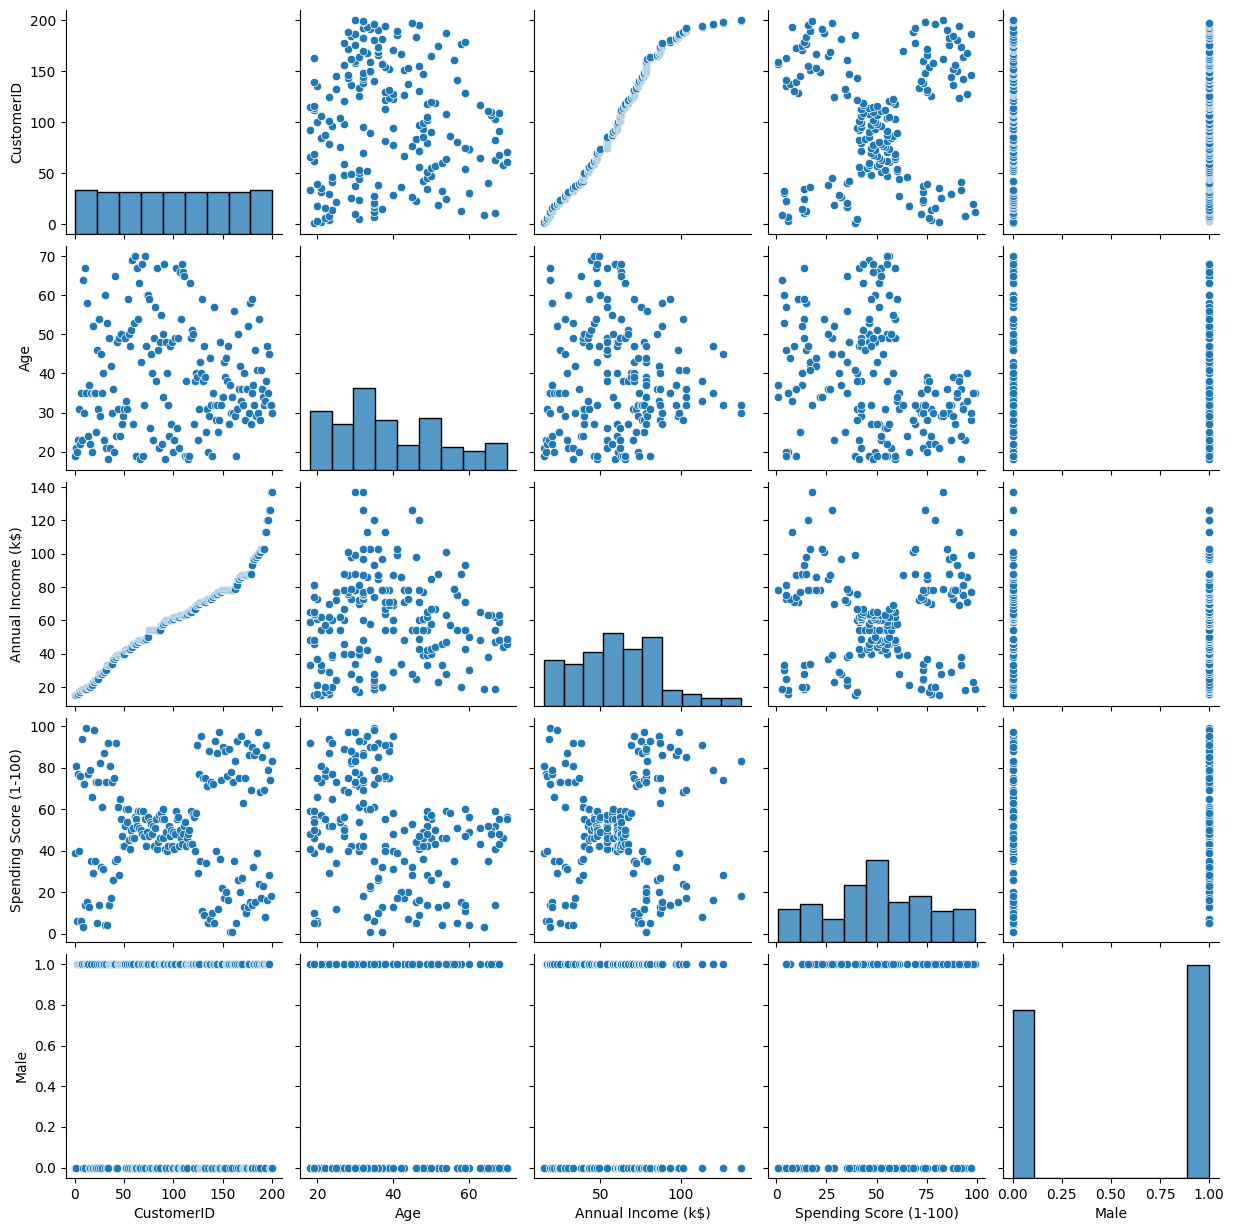

In [22]:
import random
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams


# データの読み込みと処理
df = pd.read_csv("lesson3-data.csv")
display(df)
print(df.isnull().any())#欠損値があるか

#条件を設定してダミー変数化する
df1 = df.copy()
df1.loc[df1["Gender"]=="Male","Male"] = 0
df1.loc[df1["Gender"]=="Female","Male"] = 1
df1 = df1.drop("Gender",axis=1)
display(df1)

pg = sns.pairplot(df1)
plt.savefig("pairplot.png")

In [3]:
#階層型クラスタリング
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster.hierarchical import plot_dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

    return linkage_matrix


In [4]:
# model = AgglomerativeClustering(metric='euclidean', linkage='ward',distance_threshold=0, n_clusters=None)

# model = model.fit(df1)
# fig = plt.figure(figsize=(8,8),dpi=150)
# linkage_matrix = plot_dendrogram(model, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

In [5]:
# #シルエット係数によるクラスタ数の選択
# #クラスタ内は密に集まっているほど良く、クラスタ間は遠く離れているほど良いことを表す指標
# #シルエット係数は、[-1,1]。大きいほど、良いことを表す。

# from scipy.cluster.hierarchy import fcluster
# from sklearn.metrics import silhouette_score

# clusterNumList = []
# scoreList = []

# for i in range(2,11):
#     clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
#     score = silhouette_score(df1, clusters, metric='euclidean')
#     print(i,score)
#     clusterNumList.append(i)
#     scoreList.append(score)

# fig = plt.figure(figsize=(8,8))
# plt.plot(clusterNumList,scoreList,marker="o")

In [6]:
# cluster_list = [2,6]

# plt.figure(figsize=(25,5*len(cluster_list)),tight_layout=True)
# for j, clusterNum in enumerate(cluster_list):
#   df2 = df1.copy()
#   res = fcluster(linkage_matrix, t=clusterNum, criterion='maxclust')
#   df2["cluster"] = res

#   plt.subplot((len(cluster_list)),5,j*5+1)
#   for i in range(1,clusterNum+1):
#       plt.scatter(df2[df2["cluster"]==i]["Annual Income (k$)"],df2[df2["cluster"]==i]["Age"],label="c"+str(i))
#   plt.title("Age-Annual Income")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+2)
#   for i in range(1,clusterNum+1):
#       plt.scatter(df2[df2["cluster"]==i]["Spending Score (1-100)"],df2[df2["cluster"]==i]["Age"],label="c"+str(i))
#   plt.title("Age-Spending Score")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+3)
#   for i in range(1,clusterNum+1):
#       plt.scatter(df2[df2["cluster"]==i]["Male"],df2[df2["cluster"]==i]["Age"],label="c"+str(i))
#   plt.title("Age-Gender")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+4)
#   for i in range(1,clusterNum+1):
#       plt.scatter(df2[df2["cluster"]==i]["Annual Income (k$)"],df2[df2["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
#   plt.title("Spending Score-Annual Income")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+5)
#   for i in range(1,clusterNum+1):
#       plt.scatter(df2[df2["cluster"]==i]["Male"],df2[df2["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
#   plt.title("Spending Score-Gender")
#   plt.legend()
# plt.savefig("AgglomerativeClustering.png")

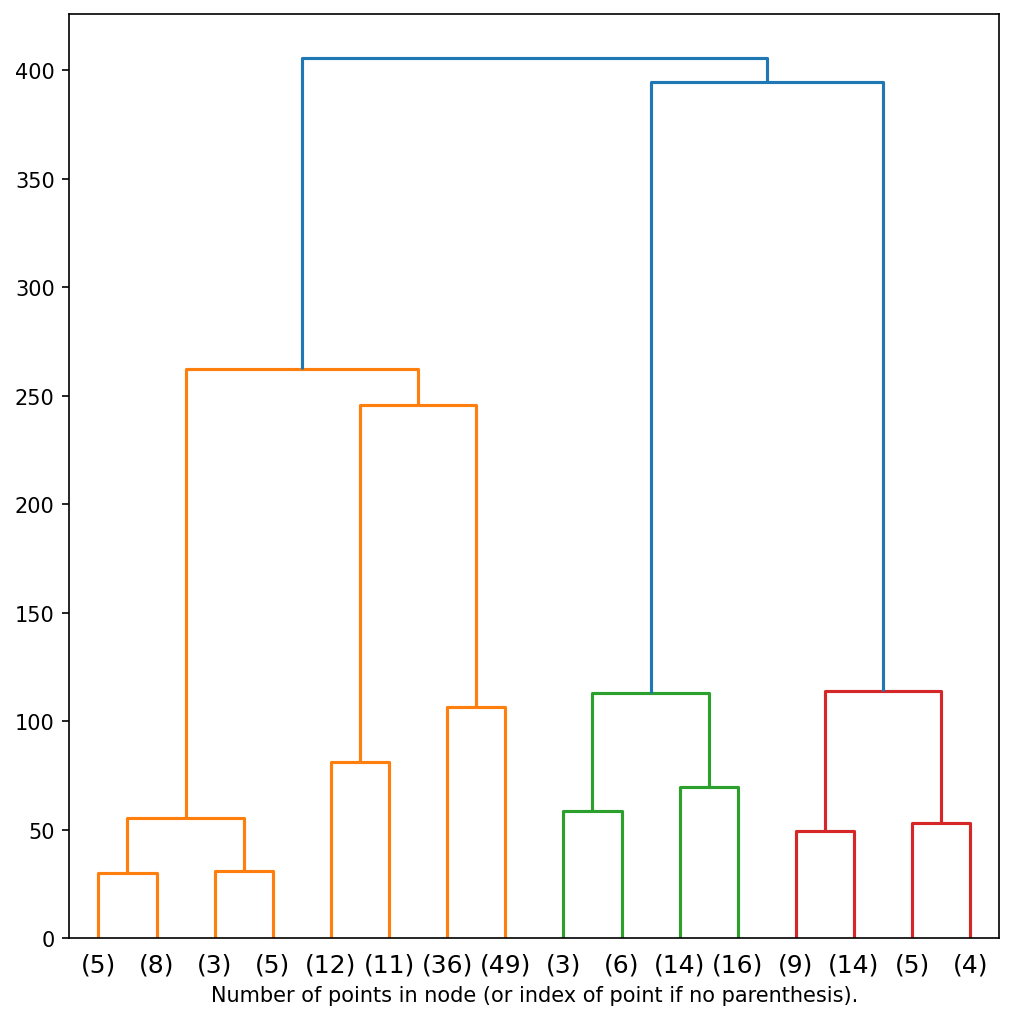

<ipython-input-7-a44803a7029f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["cluster"] = res


2 0.44545222730257217
3 0.4384463073985957
4 0.3390658290107153
5 0.4259188854391319
6 0.39162147284699933
7 0.37325662265402043
8 0.36291610740895813
9 0.3331584369633741
10 0.3020779620467252


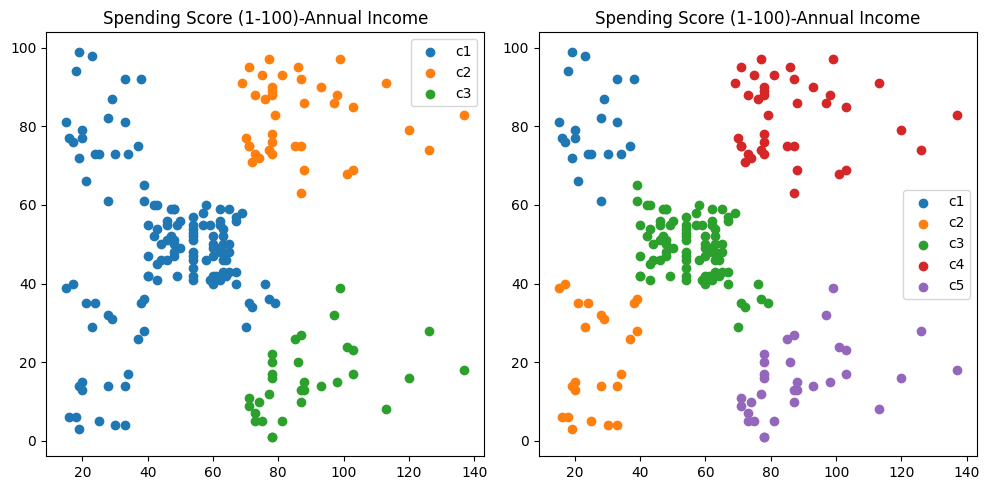

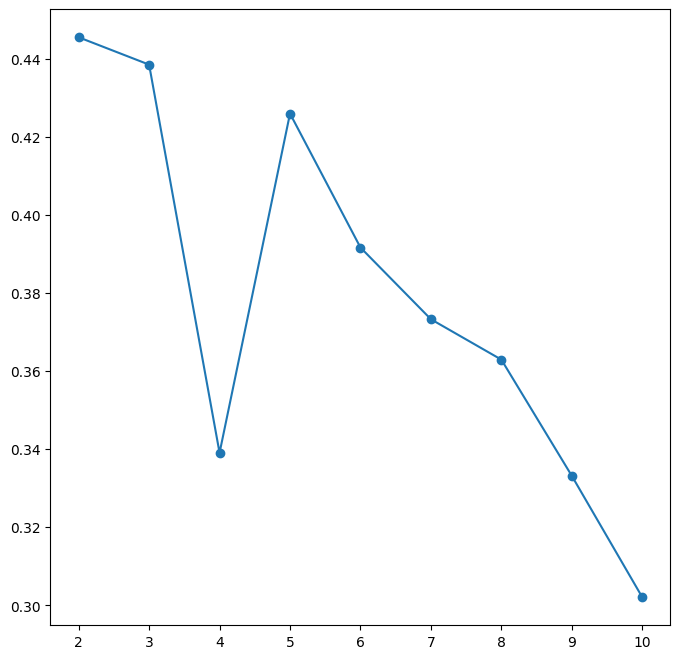

In [7]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

df3 = df1[["Spending Score (1-100)","Annual Income (k$)"]]
model = AgglomerativeClustering(metric='euclidean', linkage='ward',distance_threshold=0, n_clusters=None)
model = model.fit(df3)
fig = plt.figure(figsize=(8,8),dpi=150)
linkage_matrix = plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


clusterNum_list= [3,5]

plt.figure(figsize=(5*len(clusterNum_list),5),tight_layout=True)
for j, clusterNum in enumerate(clusterNum_list):
  plt.subplot(1,2,j+1)
  res = fcluster(linkage_matrix, t=clusterNum, criterion='maxclust')
  df3["cluster"] = res

  for i in range(1,clusterNum+1):
      plt.scatter(df3[df3["cluster"]==i]["Annual Income (k$)"],df3[df3["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
  plt.title("Spending Score (1-100)-Annual Income")
  plt.legend()

clusterNumList = []
scoreList = []

for i in range(2,11):
    clusters = fcluster(linkage_matrix, t=i, criterion='maxclust')
    score = silhouette_score(df1, clusters, metric='euclidean')
    print(i,score)
    clusterNumList.append(i)
    scoreList.append(score)

fig = plt.figure(figsize=(8,8))
plt.plot(clusterNumList,scoreList,marker="o")

In [8]:
# #非階層型クラスタリング:KMeans
# from sklearn.cluster import KMeans

# # スケーリング
# sc1 = StandardScaler()
# sc1.fit(df1)
# df1 = pd.DataFrame(sc1.transform(df1), columns=df1.columns)
# display(df1)

# clusterNumList = []
# scoreList = []

# for i in range(2,11):
#     model = KMeans(n_clusters=i, init='k-means++', n_init='auto')
#     res = model.fit_predict(df1)
#     score = silhouette_score(df1, res, metric='euclidean')
#     print(i,score)
#     clusterNumList.append(i)
#     scoreList.append(score)

# fig = plt.figure(figsize=(8,8))
# plt.plot(clusterNumList,scoreList,marker="o")

In [9]:
# cluster_list = [4,9]

# plt.figure(figsize=(25,5*len(cluster_list)),tight_layout=True)
# for j, clusterNum in enumerate(cluster_list):
#   df2 = df1.copy()
#   model = KMeans(n_clusters=clusterNum, init='k-means++', n_init='auto')
#   res = model.fit_predict(df2)
#   df2["cluster"] = res

#   plt.subplot((len(cluster_list)),5,j*5+1)
#   for i in range(clusterNum):
#       plt.scatter(df2[df2["cluster"]==i]["Annual Income (k$)"],df2[df2["cluster"]==i]["Age"],label="c"+str(i))
#   plt.title("Age-Annual Income")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+2)
#   for i in range(clusterNum):
#       plt.scatter(df2[df2["cluster"]==i]["Spending Score (1-100)"],df2[df2["cluster"]==i]["Age"],label="c"+str(i))
#   plt.title("Age-Spending Score")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+3)
#   for i in range(clusterNum):
#       plt.scatter(df2[df2["cluster"]==i]["Male"],df2[df2["cluster"]==i]["Age"],label="c"+str(i))
#   plt.title("Age-Gender")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+4)
#   for i in range(clusterNum):
#       plt.scatter(df2[df2["cluster"]==i]["Annual Income (k$)"],df2[df2["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
#   plt.title("Spending Score-Annual Income")
#   plt.legend()

#   plt.subplot((len(cluster_list)),5,j*5+5)
#   for i in range(clusterNum):
#       plt.scatter(df2[df2["cluster"]==i]["Male"],df2[df2["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
#   plt.title("Spending Score-Gender")
#   plt.legend()
# plt.savefig("KMeans.png")

<ipython-input-14-8ea6774b402d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["cluster"] = res


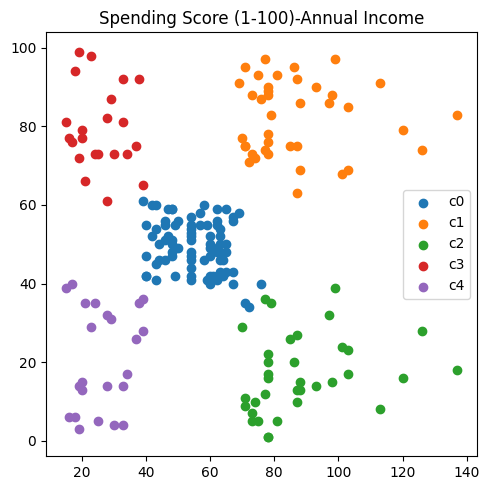

In [14]:
from sklearn.cluster import KMeans
clusterNum_list= [5]

plt.figure(figsize=(5*len(clusterNum_list),5),tight_layout=True)
for j, clusterNum in enumerate(clusterNum_list):
  # plt.subplot(1,2,j+1)
  df3 = df1[["Spending Score (1-100)","Annual Income (k$)"]]
  model = KMeans(n_clusters=clusterNum, init='k-means++', n_init='auto')
  res = model.fit_predict(df3)
  df3["cluster"] = res

  for i in range(clusterNum):
      plt.scatter(df3[df3["cluster"]==i]["Annual Income (k$)"],df3[df3["cluster"]==i]["Spending Score (1-100)"],label="c"+str(i))
  plt.title("Spending Score (1-100)-Annual Income")
  plt.legend()
plt.savefig("KMeans.png")

2 0.3904883466710931
3 0.466967100277627
4 0.4936855199768988
5 0.5553640862603758
6 0.5183164195623557
7 0.4534071579082898
8 0.439001627198456
9 0.4792774725732839
10 0.4483890272523746


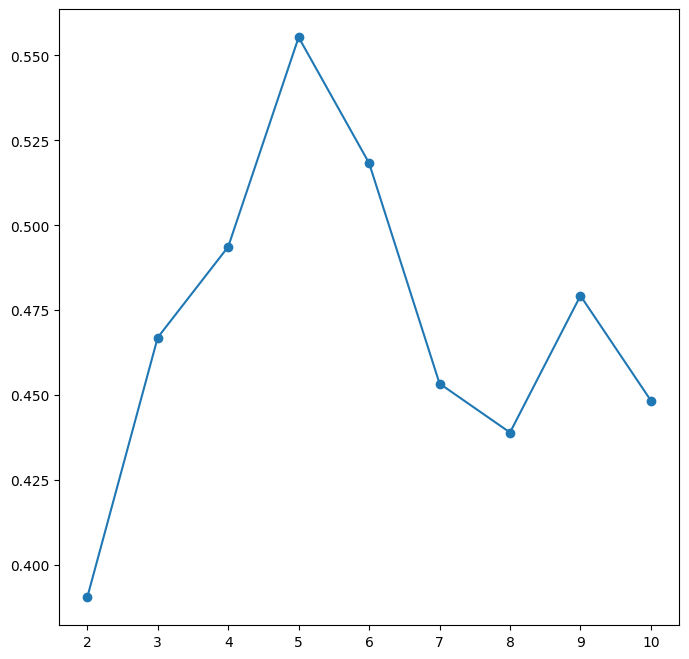

In [21]:
#非階層型クラスタリング:KMeans
from sklearn.cluster import KMeans

clusterNumList = []
scoreList = []

for i in range(2,11):
    model = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    res = model.fit_predict(df3)
    score = silhouette_score(df3, res, metric='euclidean')
    print(i,score)
    clusterNumList.append(i)
    scoreList.append(score)

fig = plt.figure(figsize=(8,8))
plt.plot(clusterNumList,scoreList,marker="o")
plt.savefig("KMeans_silhouette_score.png")